# 09 - Ridge (Lasso) Regression

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Load your dataset
df = pd.read_csv("Numeric data (last year work).csv")

In [3]:
# Define features (X) and target (y)
target_column = "Rating"  # Replace with your actual target column name if different
X = df.drop(columns=[target_column])
y = df[target_column]

In [4]:
# Feature scaling (Ridge and Lasso are sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Initialize Ridge and Lasso Regression models
ridge_model = Ridge(alpha=1.0)  # Regularization strength for Ridge
lasso_model = Lasso(alpha=0.01)  # Regularization strength for Lasso

In [7]:
# Train the models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [8]:
# Make predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

In [9]:
# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lower MSE = better model
# Lower RMSE = better model
# Lower MAE = better model
# R² Score
# 1.0: Perfect model (explains all the variance).
# 0.0: Model performs no better than a horizontal line (mean prediction).

# Linear Regression - 01
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Error (MAE): 0.2915
# R² Score: 0.5034

# XGBoost - 02
# Mean Squared Error (MSE): 0.1269
# Root Mean Squared Error (RMSE): 0.3563
# Mean Absolute Error (MAE): 0.2802
# R² Score: 0.5255

# CatBoost - 03
# Mean Squared Error (MSE): 0.1228
# Root Mean Squared Error (RMSE): 0.3504
# Mean Absolute Error (MAE): 0.2792
# R² Score: 0.5411

# AdaBoost - 04
# Mean Squared Error (MSE): 0.1453
# Root Mean Squared Error (RMSE): 0.3811
# Mean Absolute Error (MAE): 0.3070
# R² Score: 0.4570

# LightGBM - 05
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Error (MAE): 0.2915
# R² Score: 0.5034

# Random forest - 06
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Erro

# KNN - 07
# Mean Squared Error (MSE): 0.1890
# Root Mean Squared Error (RMSE): 0.4348
# Mean Absolute Error (MAE): 0.3478
# R² Score: 0.2933

# SVM - 08
# Mean Squared Error (MSE): 0.2097
# Root Mean Squared Error (RMSE): 0.4579
# Mean Absolute Error (MAE): 0.3797
# R² Score: 0.2161

# my opinion:
# results are quite good except R² Score
# this score shows that our model has almost half of predicitons wrong
# let's see if we can improve this metric by utulizing other models

In [10]:
# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


In [ ]:
# Print results
print(f"Ridge Regression - R² Score: {r2_ridge:.4f}, RMSE: {rmse_ridge:.4f}, MAE: {mae_ridge:.4f}")
print(f"Lasso Regression - R² Score: {r2_lasso:.4f}, RMSE: {rmse_lasso:.4f}, MAE: {mae_lasso:.4f}")

# I do not see any significant improvements in metrics
# now I start to think that maybe there is a problem in the dataset
# it is impossible that after trying 10 different models
# I could not enhance metrics


Ridge Regression - R² Score: 0.5116, RMSE: 0.3615, MAE: 0.2888
Lasso Regression - R² Score: 0.5107, RMSE: 0.3618, MAE: 0.2878


In [12]:
# Feature Importance (Lasso shrinks coefficients)
lasso_coef = pd.Series(lasso_model.coef_, index=X.columns)
ridge_coef = pd.Series(ridge_model.coef_, index=X.columns)

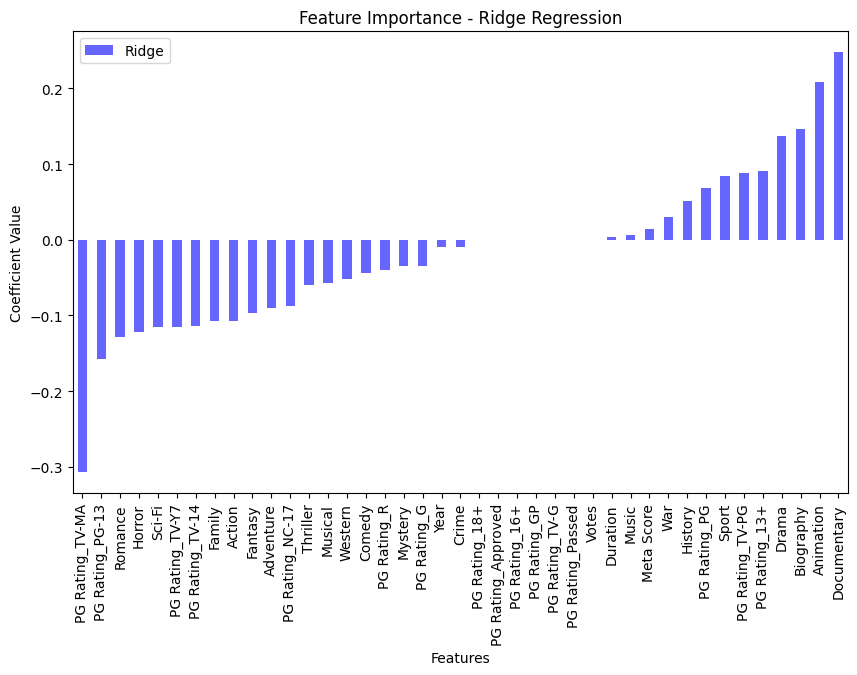

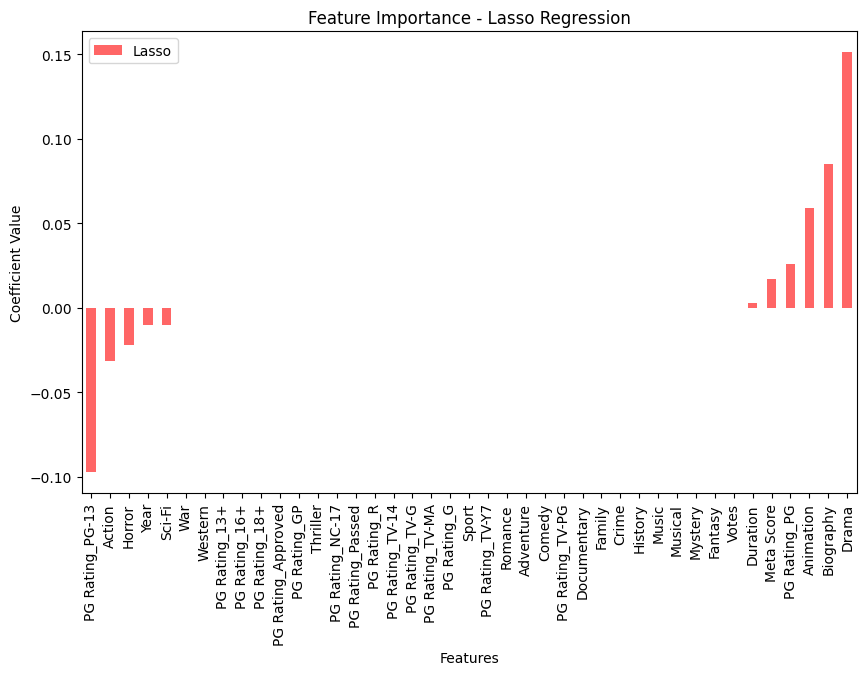

In [13]:
# Plot Ridge and Lasso Coefficients
plt.figure(figsize=(10, 6))
ridge_coef.sort_values().plot(kind='bar', label="Ridge", alpha=0.6, color='blue')
plt.title("Feature Importance - Ridge Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
lasso_coef.sort_values().plot(kind='bar', label="Lasso", alpha=0.6, color='red')
plt.title("Feature Importance - Lasso Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()